In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import matplotlib.animation as animation
from matplotlib import style
import random
import csv
import numpy as np
import urllib.request
import datetime
import io

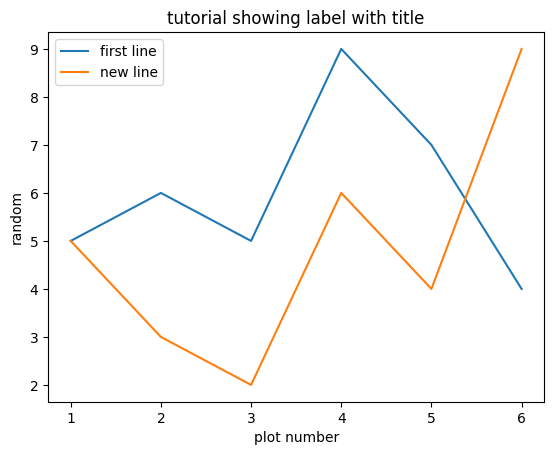

In [ ]:
# basic matplotlib graph

x = [1,2,3,4,5,6]
y = [5,6,5,9,7,4]
x2 = [3,4,6,5,8,10]
y2 = [5,3,2,6,4,9]

# line
plt.plot(x, y, label='first line')
plt.plot(x,y2, label='new line')

plt.xlabel('plot number')
plt.ylabel('random')

plt.title('tutorial showing label with title')
plt.legend()

plt.show()



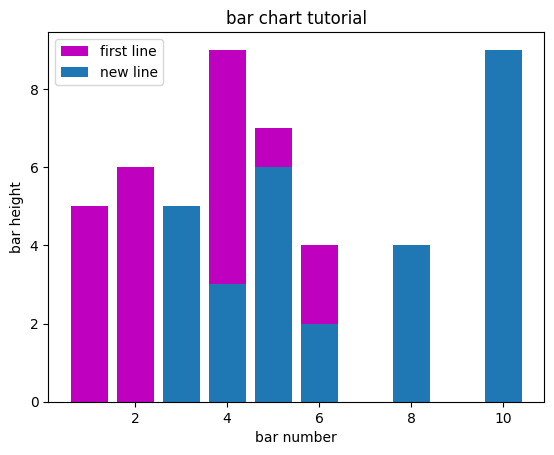

In [ ]:
# bar chart
plt.bar(x, y, label='first line', color='m')
plt.bar(x2,y2, label='new line')

plt.xlabel('bar number')
plt.ylabel('bar height')
plt.title('bar chart tutorial')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

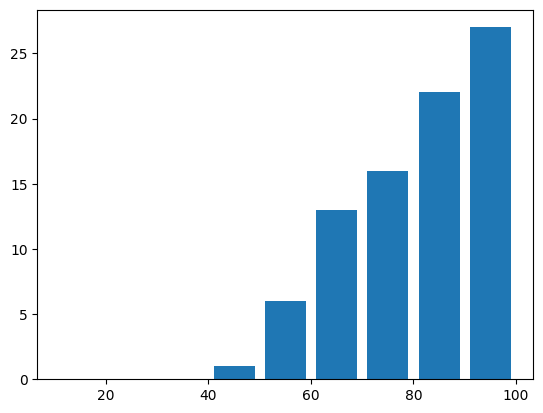

In [ ]:
# histogram
test_score = [60,55,90,65,55,70,76,85,91,44,56,61,63,65,66,59,53,70,80,89,81,84,83,90,92,93,60]

# z = [z for z in range(len(test_score))]

# plt.bar(z, test_score)
# plt.show

bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(test_score, bins, histtype='bar', cumulative=True, rwidth=0.8)
plt.show

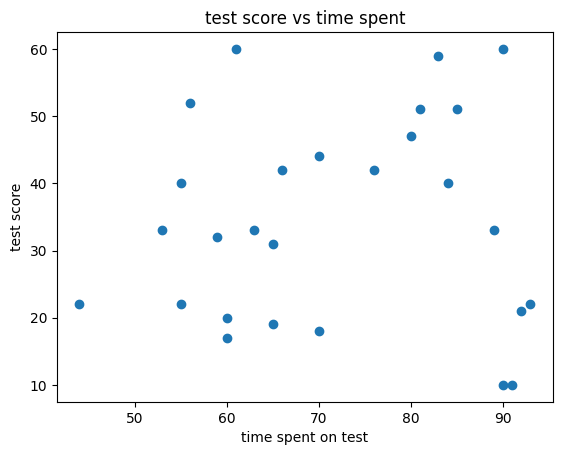

In [ ]:
# scatter plot
test_score2 = [60,55,90,65,55,70,76,85,91,44,56,61,63,65,66,59,53,70,80,89,81,84,83,90,92,93,60]
time_spent  = [20,22,10,19,40,44,42,51,10,22,52,60,33,31,42,32,33,18,47,33,51,40,59,60,21,22,17]

plt.xlabel('time spent on test')
plt.ylabel('test score')
plt.title('test score vs time spent')

plt.scatter(test_score2, time_spent)
plt.show()



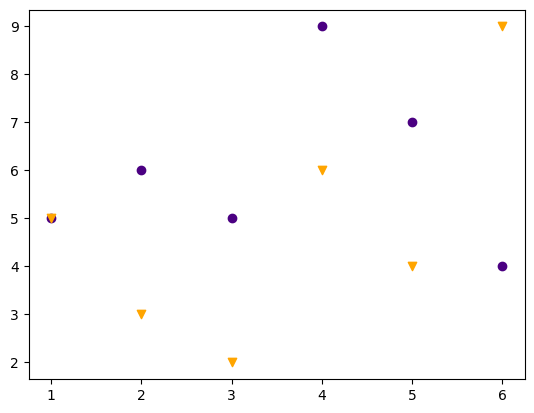

In [ ]:
plt.scatter(x, y, marker='o', color='indigo')
plt.scatter(x, y2, marker='v', color='orange')

In [ ]:
# stack plots
year = [1,2,3,4,5,6,7,8,9,10]

# are in the thousans
taxes = [17,18,40,43,44,8,43,32,39,30]
overhead = [30,22,9,29,17,12,14,24,49,35]
entertainment = [41,32,27,13,19,12,22,18,28,20]

plt.plot([],[], color='m', label='taxes')
plt.plot([],[], color='c', label='overhead')
plt.plot([],[], color='y', label='entertainment')

plt.stackplot(year, taxes, overhead, entertainment, colors = ['m','c','y'])

plt.legend()
plt.xlabel('year')
plt.ylabel('cost in thousands')
plt.title('company expenses')
plt.show()

In [ ]:
# pie chart
labels = ['Taxes', 'Overhead', 'Entertainment']

sizes = [25,32,12]
colors = ['r','c','y']

plt.pie(sizes, labels=labels, colors=colors, startangle=90, shadow = True, explode=(0.1,0.1,0.1), autopct='%1.1f%%')
plt.axis('equal')

plt.show()

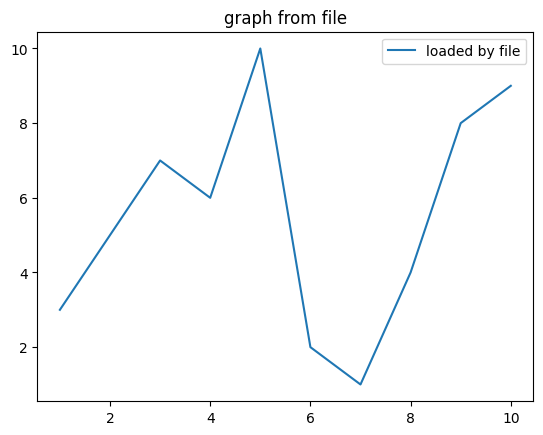

In [ ]:
# loading data from CSV file
a = []
b = []

with open('test.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        a.append(int(row[0]))
        b.append(int(row[1]))
        
plt.plot(a,b, label='loaded by file')
plt.xlabel=('plot number')
plt.ylabel=('random chosen tutorial')
plt.title('graph from file')
plt.legend()
plt.show()

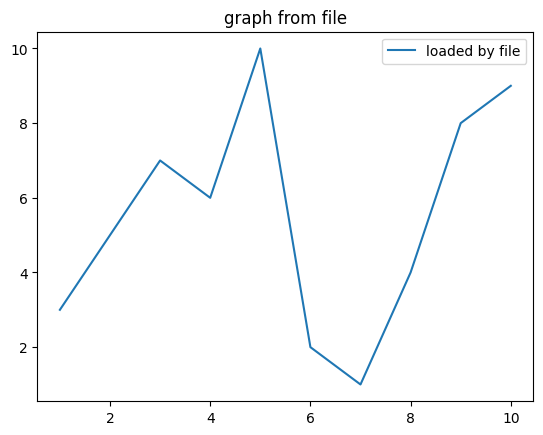

In [ ]:
# read data from file using numpy
a2, b2 = np.loadtxt('test.csv', delimiter=',', unpack = True)

plt.plot(a2,b2, label='loaded by file')
plt.xlabel=('plot number')
plt.ylabel=('random chosen tutorial')
plt.title('graph from file')
plt.legend()
plt.show()

In [ ]:
# source for our data

def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.AutoDateFormatter(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytesconverter

# def bytespdate2num(fmt, encoding='utf-8'):
#     str_converter = mdates.datestr2num
#     def bytesconverter(b):
#         s = b.decode(encoding)
#         dt = datetime.datetime.strptime(s, fmt)
#         return str_converter(dt.strftime('%yyyy-%mm-&dd'))  # Modify the date format here
#     return bytesconverter

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('price')
    plt.xlabel('date')

    print('Currently pulling', stock)
    url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock + '?period1=1654139008&period2=1685675008&interval=1d&events=history&includeAdjustedClose=true'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 7:  
            if 'values' not in each_line:
                stock_data.append(each_line)

    date, openp, highp, lowp, closep, ajdClose, volume = np.loadtxt(stock_data, delimiter=',', unpack=True, converters={0: bytespdate2num('%Y%m%d')})
    # date, openp, highp, lowp, closep, ajdClose, volume = np.loadtxt(stock_data, delimiter=',', unpack=True)
    
    # date, openp, highp, lowp, closep, ajdClose, volume = np.loadtxt(stock_data, delimiter=',', unpack=True)
    # date_conv = np.vectorize(datetime.datetime.fromtimestamp)
    # date = date_conv(date)

    g = 0
    h = len(date)

    new_ar = []
    while g < h:
      append_line =  date[g], openp[g], highp[g], lowp[g], closep[g], ajdClode[g], volume[g]
      new_list.append(append_line)
      g +=1

    ax1.plt.plot_date(date, closep, '-')

    # ax1.fill_between(date, closep, 83.75, where=(closep >= 83.75), facecolor='g', alpha=.5)
    # ax1.fill_between(date, closep, 83.65, where=(closep <= 83.65), facecolor='r', alpha=.5)
    # ax1.axhline(83.65, color='r')
    # ax1.axhline(83.85, color='g')
    
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxix.label.set_color('c')
    ax1.set.yticks([83.5,64,84.5])
    ax1.spines['left'].set_color('c')
    ax1.spines['bottom'].set_color('c')

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    ax1.spines['left'].set_linewidth(5)
    ax1.spines['bottom'].set_linewidth(5)
    for label in ax1.xaxis.get_ticklabels():
      label.set_rotation(45)

    plt.subplot_adjust(left=.09, bottom=.16, right=.94, top=.95, wspace=.2, hspace=.2)
    plt.show()

stock = input('Stock to plot: ')
graph_data(stock)

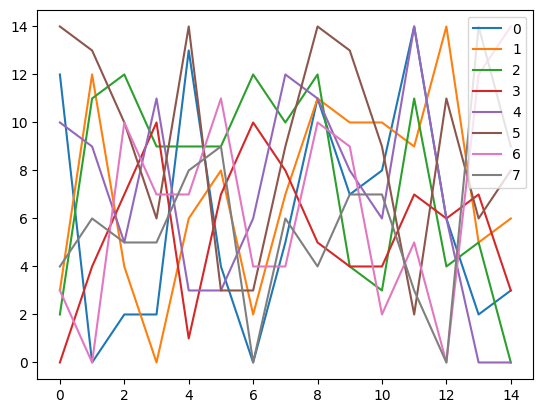

In [9]:
# create our own style

#style.use('ggplot')
for label in range(8):
  n = []
  m = []

  for i in range(0,15):
    ms = random.randrange(0,15)
    ns = i
    n.append(ns)
    m.append(ms)
    
  plt.plot(n,m,label=label)
plt.legend()
plt.show()

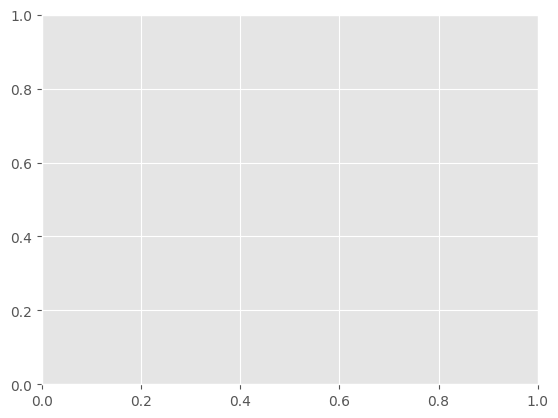

In [7]:
# live graphs
# style.use('ggplot')

fig= plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pull_data = open('test.csv','r').read()
    data_list = pull_data.split('\n')
    xs = []
    ys = []
    
    for line in data_list:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(int(x))
            ys.append(int(y))
            
    ax1.clear()
    ax1.plot(xs,ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

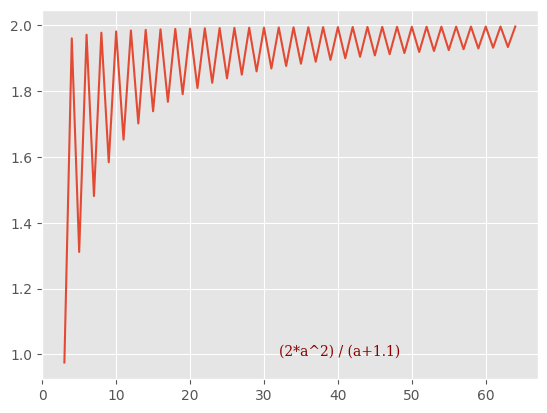

In [12]:
# adding and placing text

aa = []
bb = []

for i in range(3,65):
    a = i
    b = (2*a^2) / (a+1.1)
    
    aa.append(a)
    bb.append(b)
    
plt.plot(aa,bb)

font = {'family': 'serif', 'color': 'darkred', 'size':10}
plt.text(aa[-1]/2,bb[-1]/2,'(2*a^2) / (a+1.1)',fontdict=font)

plt.show()